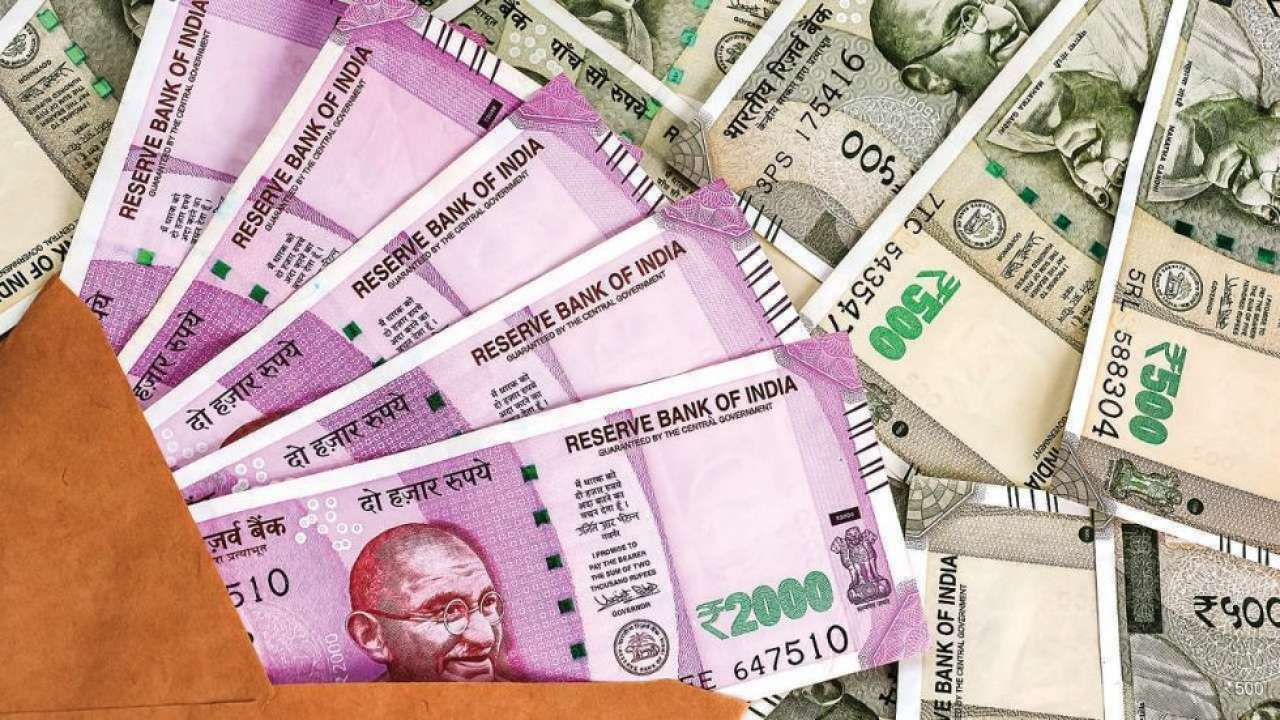

# Import basic libraries and data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data = pd.read_csv('../input/bank-note-authentication-uci-data/BankNote_Authentication.csv')

# Data Observation

In [3]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
data.describe(include = 'all')

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

# Data Visualization

<AxesSubplot:>

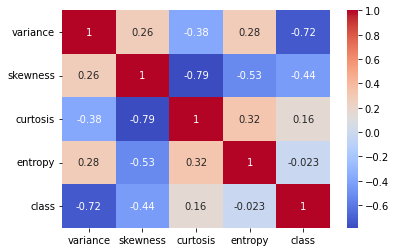

In [7]:
import seaborn as sns

corr = data.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

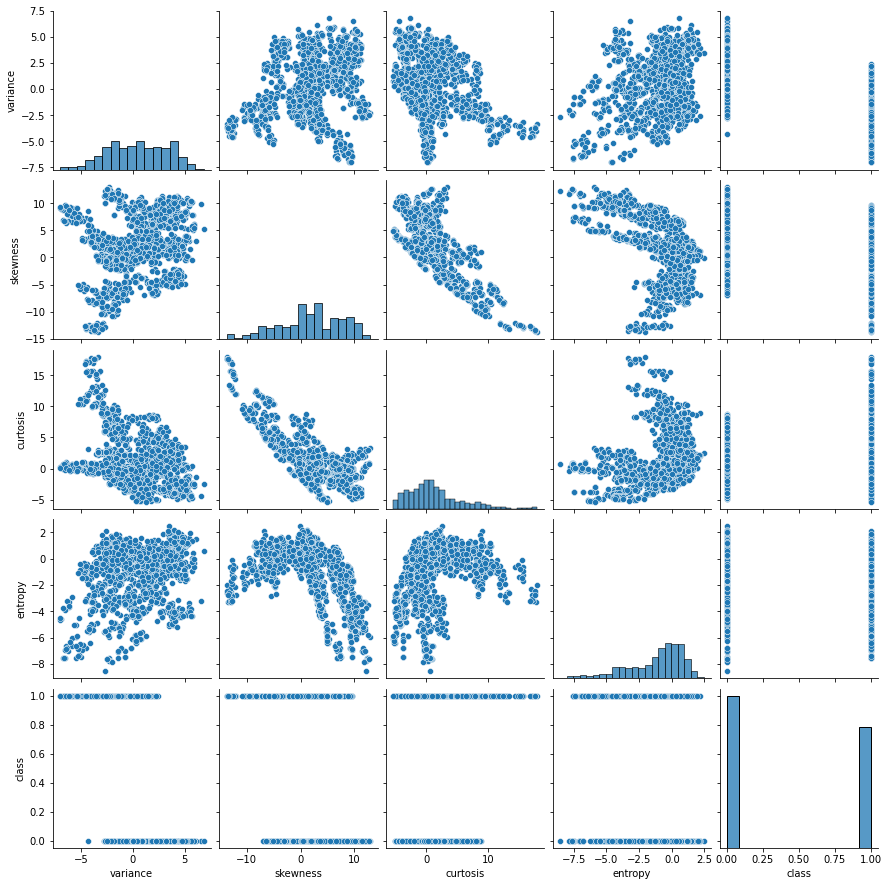

In [8]:
sns.pairplot(data)

# Data Split

In [9]:
data.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [10]:
X = data[['variance', 'skewness', 'curtosis', 'entropy']]
y = data['class']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=2529)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((411, 4), (961, 4), (411,), (961,))

# Scaling 

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [14]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Logestic Regressioin

In [15]:
from sklearn.linear_model import  LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [16]:
pred = lr.predict(X_test)

# Results

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       533
           1       0.96      1.00      0.98       428

    accuracy                           0.98       961
   macro avg       0.98      0.98      0.98       961
weighted avg       0.98      0.98      0.98       961

[[515  18]
 [  2 426]]


<AxesSubplot:>

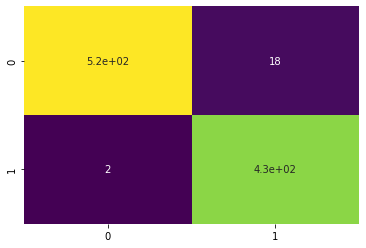

In [19]:
cm =  confusion_matrix(y_test,pred)
sns.heatmap(cm,annot = True,cmap='viridis',cbar = False)